In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [24]:
data = pd.read_csv("website-data.csv")
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


## ***Dataset Cleaning and Preprocessing***

In [ ]:
data.columns = ['SCG', 'Time', 'Users', 'Sessions', 'ESS', 'AETPS', 'ESPU', 'EvPS', 'ER', 'EvC']
data['Time'] = data['Time'].apply(lambda x: str(x)).apply(lambda x: f"{x[:4]}-{x[4:6]}-{x[6:8]}-{x[8:]}")
data['Time'] = pd.to_datetime(data['Time'])
data.head()

,SCG,Time,Users,Sessions,ESS,AETPS,ESPU,EvPS,ER,EvC
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SCG       3182 non-null   object        
 1   Time      3182 non-null   datetime64[ns]
 2   Users     3182 non-null   int64         
 3   Sessions  3182 non-null   int64         
 4   ESS       3182 non-null   int64         
 5   AETPS     3182 non-null   float64       
 6   ESPU      3182 non-null   float64       
 7   EvPS      3182 non-null   float64       
 8   ER        3182 non-null   float64       
 9   EvC       3182 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 248.7+ KB


In [66]:
data['SCG'].describe()

count       3182
unique         7
top       Direct
freq         672
Name: SCG, dtype: object

In [33]:
data['Year'] = data['Time'].dt.year
data['Day'] = data['Time'].dt.day_name()
data['Mon'] = data['Time'].dt.month
data['DayTime'] = data['Time'].dt.hour
data.head()

,SCG,Time,Users,Sessions,ESS,AETPS,ESPU,EvPS,ER,EvC,Year,Day,Mon,DayTime
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,2024,Tuesday,4,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,2024,Wednesday,4,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,2024,Wednesday,4,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,2024,Wednesday,4,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,2024,Wednesday,4,20


In [38]:
data['Year'].unique()

array([2024], dtype=int32)

In [34]:
edges = [0, 5, 12, 16, 20, 23]
labels = ["Midnight", "Morning", "Afternoon", "Evening", "Night"]
data['DayTime'] = pd.cut(
    data['DayTime'],
    bins=edges,
    labels=labels
)
data.head()

,SCG,Time,Users,Sessions,ESS,AETPS,ESPU,EvPS,ER,EvC,Year,Day,Mon,DayTime
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,2024,Tuesday,4,Night
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,2024,Wednesday,4,Evening
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,2024,Wednesday,4,Night
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,2024,Wednesday,4,Evening
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,2024,Wednesday,4,Evening


### **1. What patterns or trends can you observe in website sessions and users over time?**

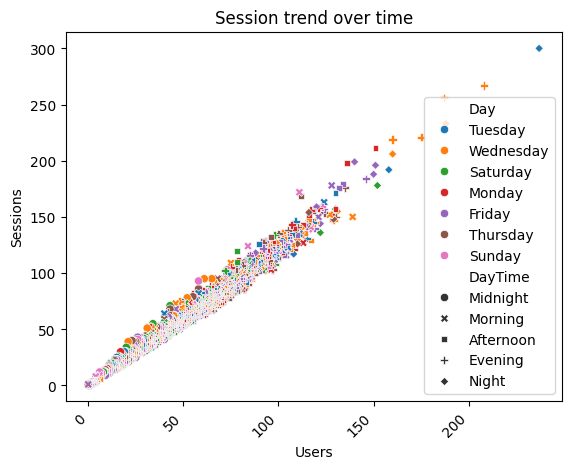

In [ ]:
sns.scatterplot(x=data['Users'], y=data['Sessions'], hue=data["Day"], style=data["DayTime"])
plt.title("Session trend over time")
plt.xlabel("Users")
plt.ylabel("Sessions")
plt.xticks(rotation=45, ha='right')
plt.show()

(array([19818., 19822., 19826., 19830., 19834., 19838., 19842., 19844.,
        19848.]),
 [Text(19818.0, 0, '2024-04-05'),
  Text(19822.0, 0, '2024-04-09'),
  Text(19826.0, 0, '2024-04-13'),
  Text(19830.0, 0, '2024-04-17'),
  Text(19834.0, 0, '2024-04-21'),
  Text(19838.0, 0, '2024-04-25'),
  Text(19842.0, 0, '2024-04-29'),
  Text(19844.0, 0, '2024-05-01'),
  Text(19848.0, 0, '2024-05-05')])

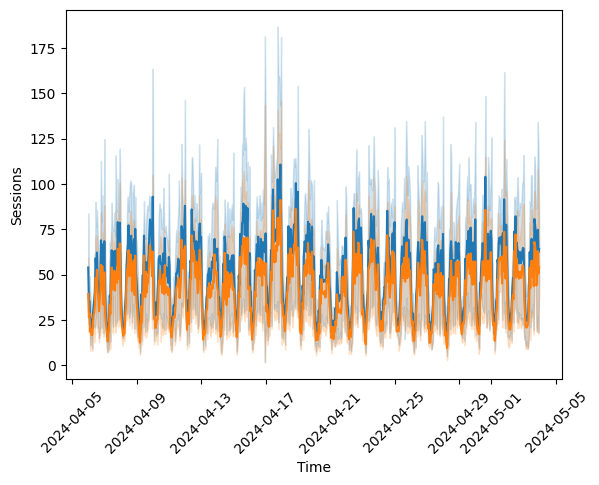

In [109]:
sns.lineplot(x=data["Time"], y=data["Sessions"])
sns.lineplot(x=data["Time"], y=data["Users"])
plt.xticks(rotation=45)

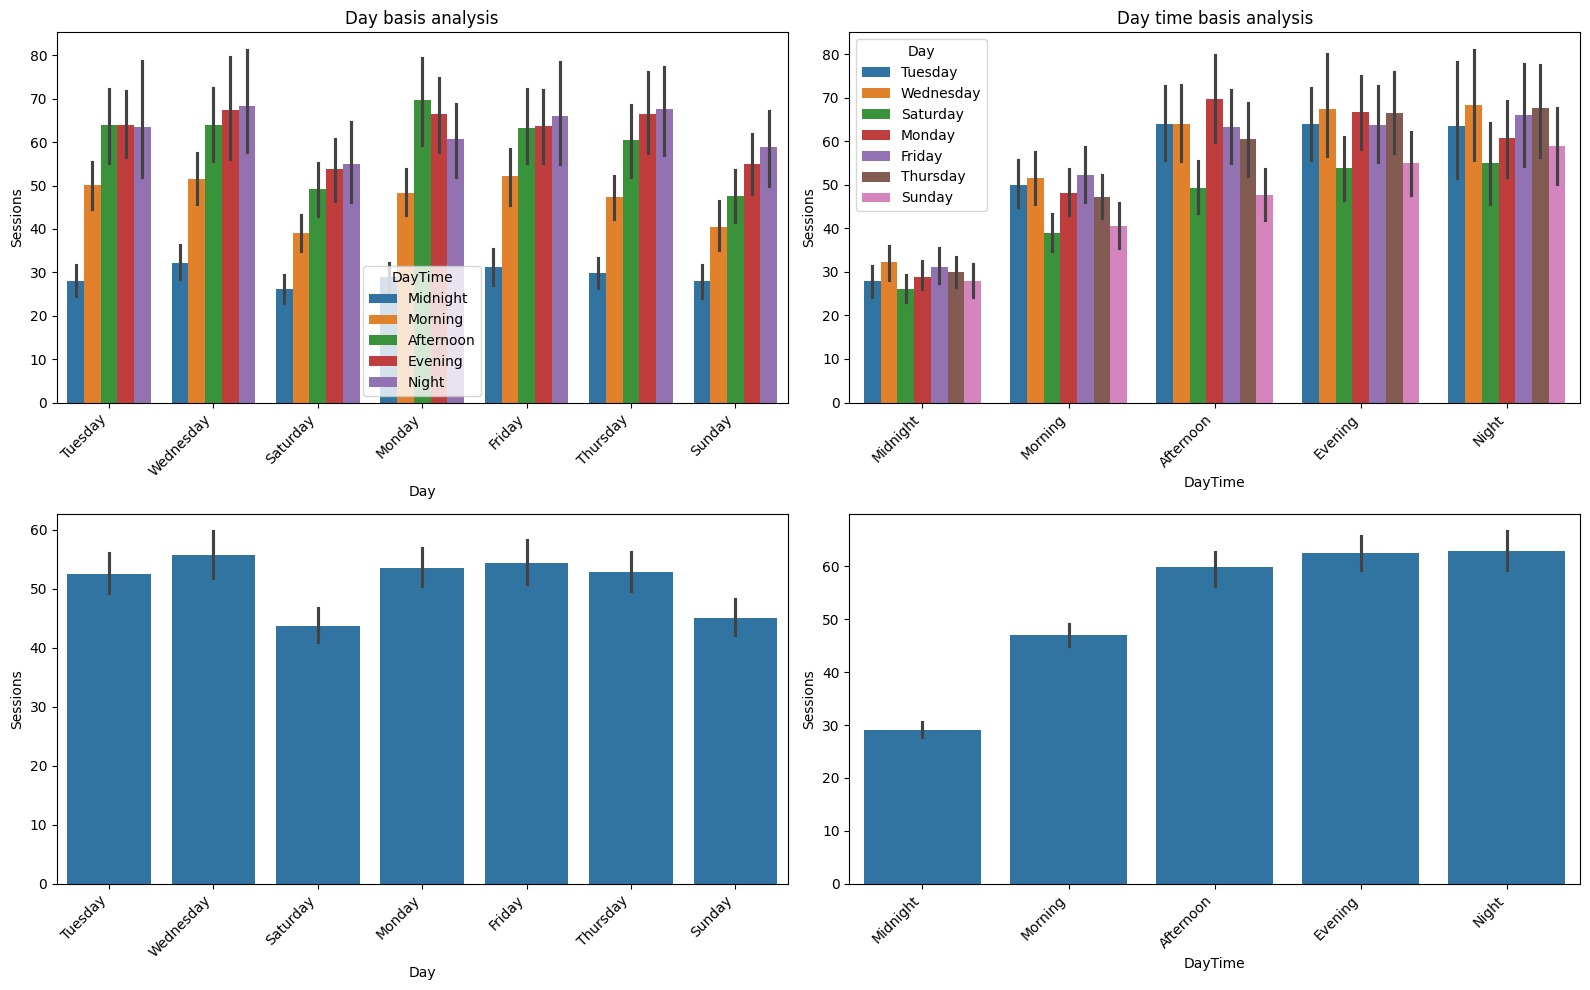

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title("Day basis analysis")
sns.barplot(x=data["Day"], y=data["Sessions"], hue=data["DayTime"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
plt.title("Day time basis analysis")
sns.barplot(x=data["DayTime"], y=data["Sessions"], hue=data["Day"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
sns.barplot(x=data["Day"], y=data["Sessions"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
sns.barplot(x=data["DayTime"], y=data["Sessions"])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

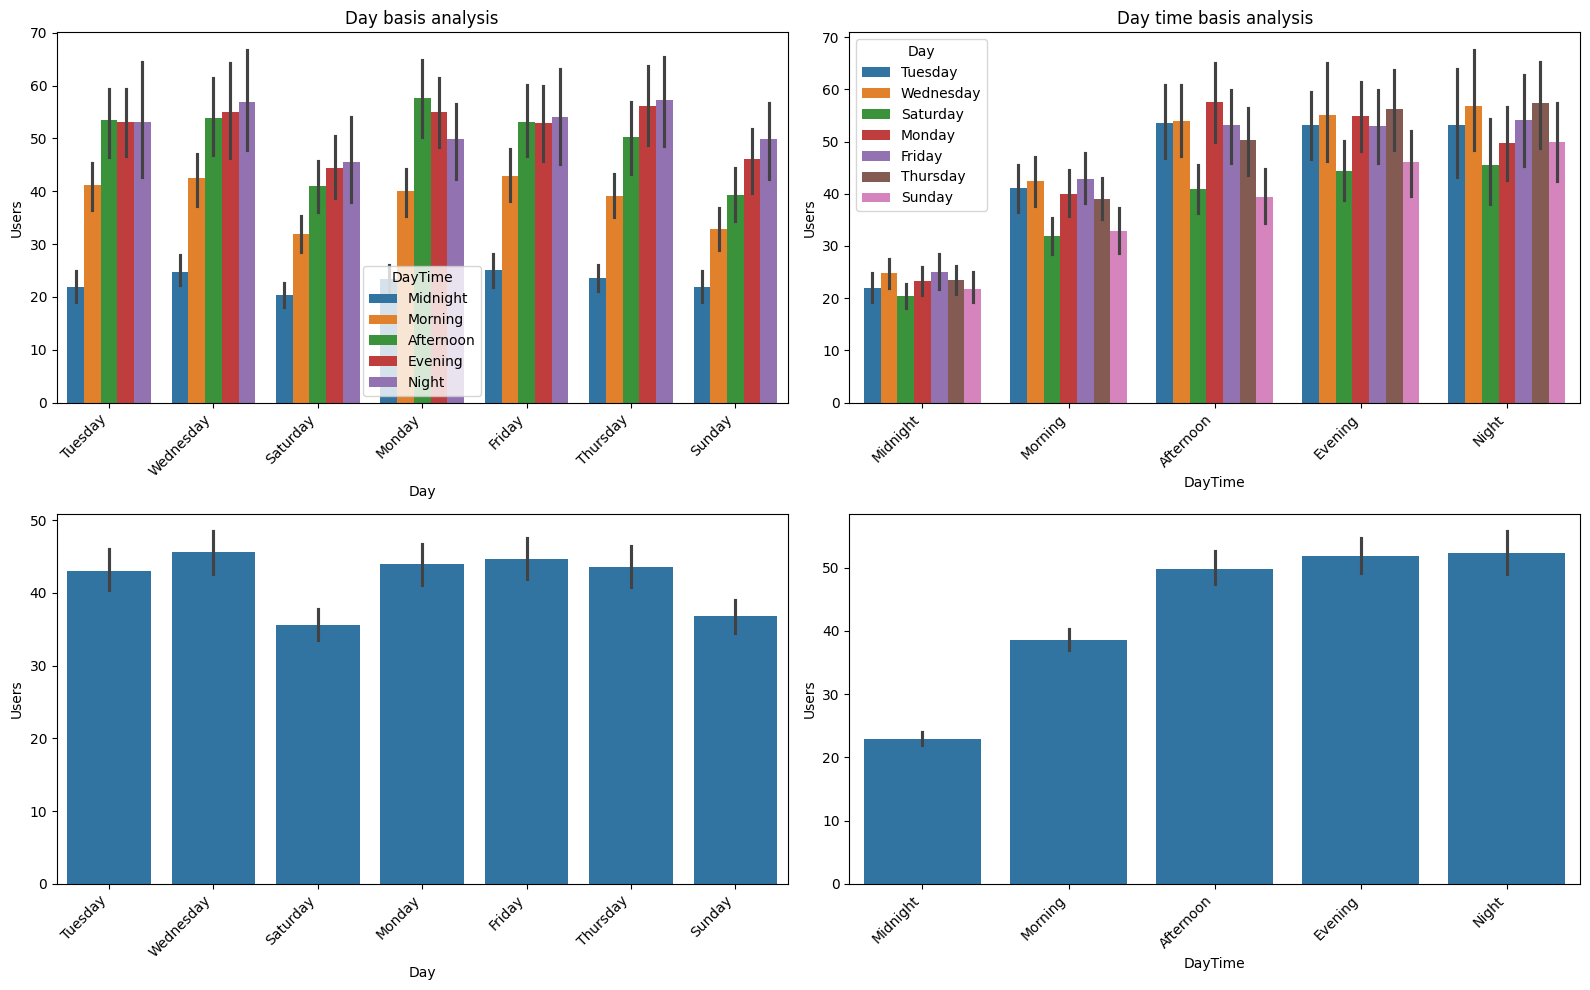

In [47]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
plt.title("Day basis analysis")
sns.barplot(x=data["Day"], y=data["Users"], hue=data["DayTime"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
plt.title("Day time basis analysis")
sns.barplot(x=data["DayTime"], y=data["Users"], hue=data["Day"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
sns.barplot(x=data["Day"], y=data["Users"])
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
sns.barplot(x=data["DayTime"], y=data["Users"])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### **2. Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?**

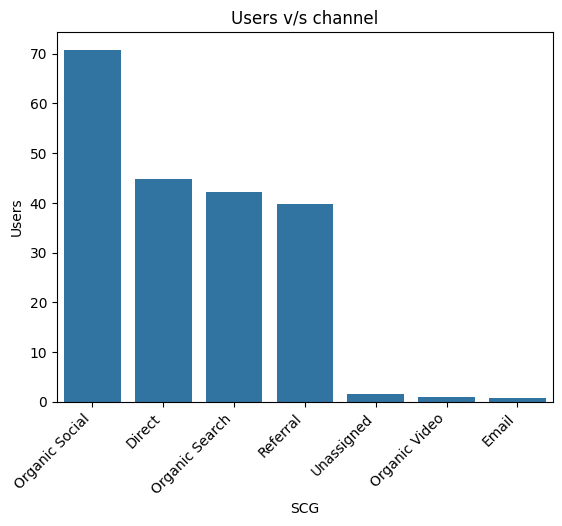

In [64]:
sns.barplot(data.groupby(['SCG'])['Users'].mean().sort_values(ascending=False))
plt.title("Users v/s channel")
plt.xticks(rotation=45, ha="right")
plt.show()

### **3. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?**

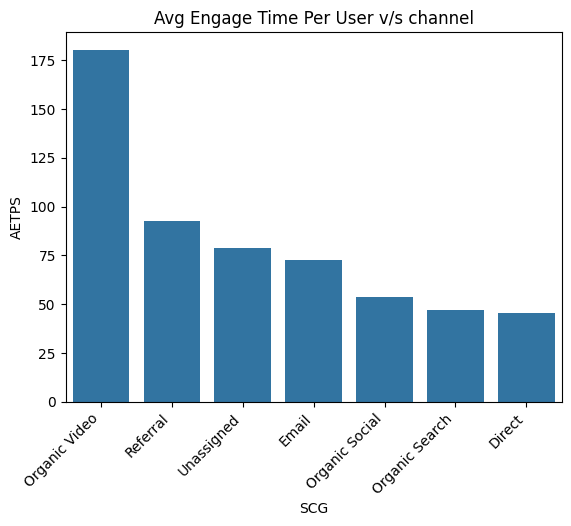

In [63]:
sns.barplot(data.groupby(['SCG'])['AETPS'].mean().sort_values(ascending=False))
plt.title("Avg Engage Time Per User v/s channel")
plt.xticks(rotation=45, ha="right")
plt.show()

- Average Engagement Time becomes maximum for Organic Video. This 

In [76]:
data.groupby(['SCG'])['ER']

### **3. How does engagement rate vary across different traffic channels?**

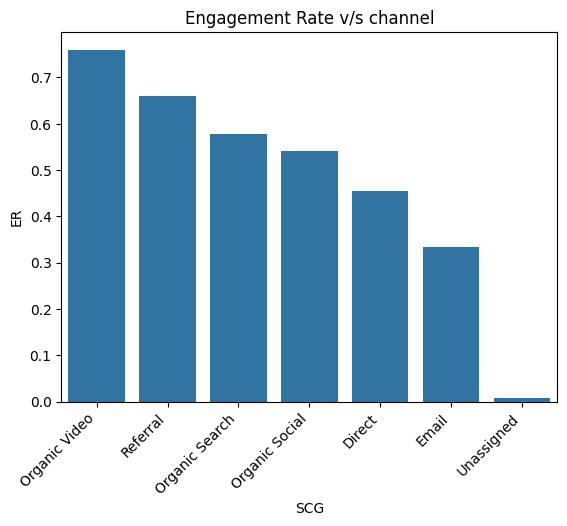

In [67]:
sns.barplot(data.groupby(['SCG'])['ER'].mean().sort_values(ascending=False))
plt.title("Engagement Rate v/s channel")
plt.xticks(rotation=45, ha="right")
plt.show()

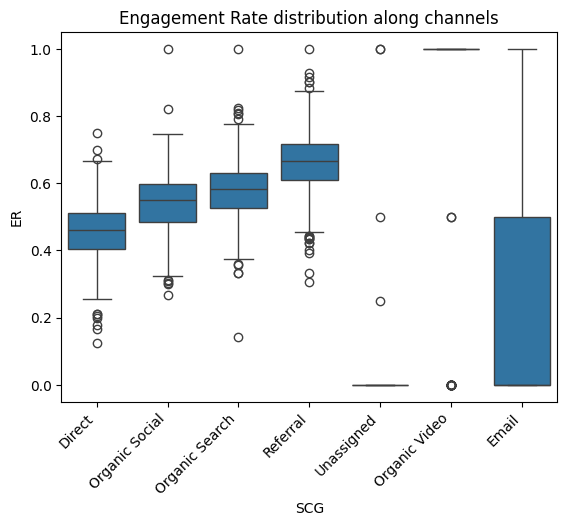

In [80]:
sns.boxplot(data=data, x="SCG", y="ER")
plt.title("Engagement Rate distribution along channels")
plt.xticks(rotation=45, ha="right")
plt.show()

### **4. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?**

In [95]:
session_data = data.loc[:, 'Sessions': 'ESS']
session_data['NESS'] = data['Sessions'] - data['ESS']
session_data['SCG'] = data['SCG']
session_data = session_data.melt(id_vars='SCG', value_vars=['ESS', 'NESS'])
session_data

,SCG,variable,value
0,Direct,ESS,144
1,Organic Social,ESS,132
2,Direct,ESS,115
3,Organic Social,ESS,125
4,Organic Social,ESS,112
...,...,...,...
6359,Unassigned,NESS,1
6360,Unassigned,NESS,1
6361,Unassigned,NESS,1
6362,Unassigned,NESS,1


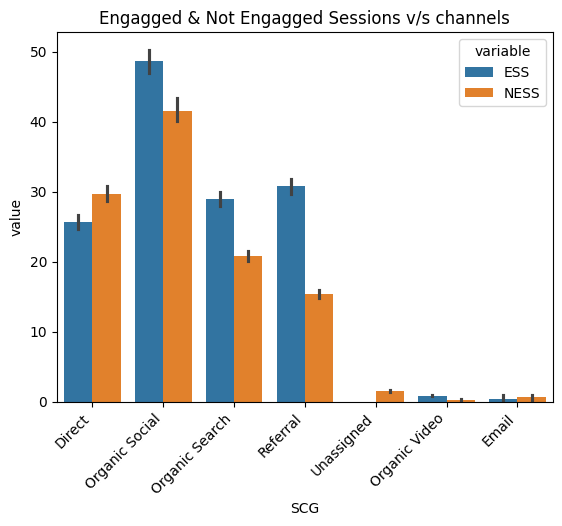

In [97]:
sns.barplot(data=session_data, x="SCG", y="value", hue="variable")
plt.title("Engagged & Not Engagged Sessions v/s channels")

plt.xticks(rotation=45, ha="right")
plt.show()

### **5. At what hours of the day does each channel drive the most traffic?**

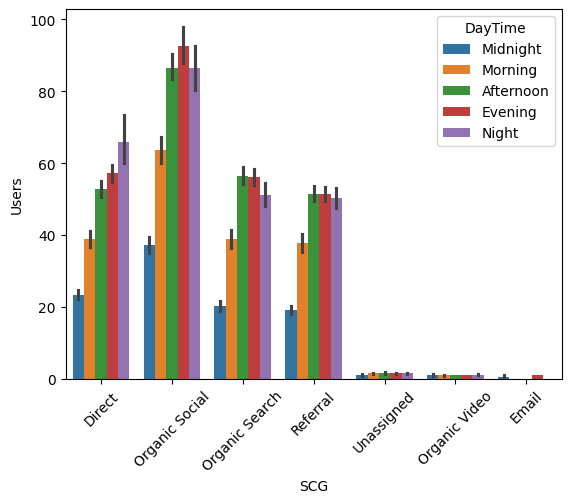

In [117]:
sns.barplot(x=data["SCG"], y=data["Users"], hue=data["DayTime"])
plt.xticks(rotation=45)
plt.show()

C:\Users\SOUMYOJEET\AppData\Local\Temp\ipykernel_3748\1289425963.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.heatmap(data.groupby(["DayTime", "SCG"])["Users"].mean().unstack(), annot=True)


<Axes: xlabel='SCG', ylabel='DayTime'>

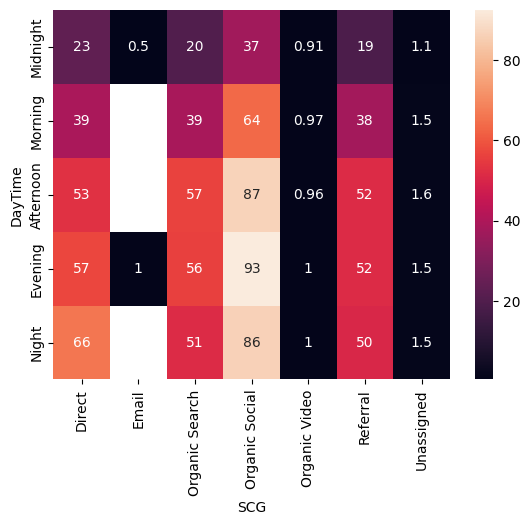

In [106]:
sns.heatmap(data.groupby(["DayTime", "SCG"])["Users"].mean().unstack(), annot=True)

### **6. Is there any correlation between high traffic (sessions) and high engagement rate over time?**

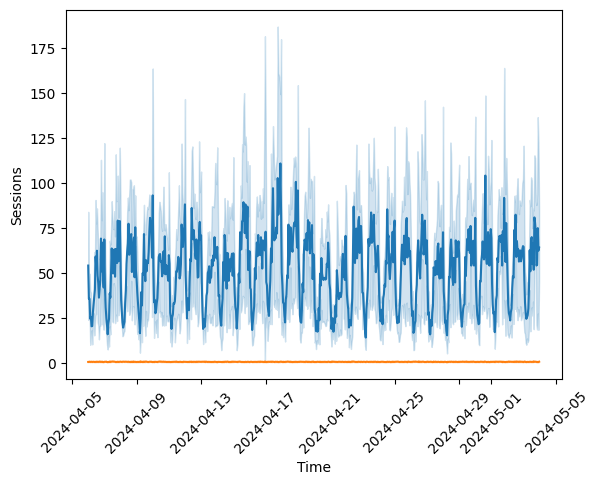

In [111]:
sns.lineplot(x=data["Time"], y=data["Sessions"])
sns.lineplot(x=data["Time"], y=data["ER"])
plt.xticks(rotation=45)
plt.show()

- **No strong corr, which means high traffucs does always not lead to high engagement rate**